<a href="https://colab.research.google.com/github/Ijezue/Ijezue/blob/main/AoA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
def bottomUp(values, weights, W):
    k = [[0 for _ in range(W+1)] for _ in range(len(weights)+1)]

    for i in range(len(weights)+1):
        for j in range(W+1):
            if i == 0 or j == 0:
                k[i][j] = 0
            elif weights[i-1] <= j:
                k[i][j] = max(values[i-1] + k[i-1][j - weights[i-1]], k[i-1][j])
            else:
                k[i][j] = k[i-1][j]
    return k[len(weights)][W]

profit = [60, 100, 120]
weights = [10, 20, 30]
W = 50
print(bottomUp(profit, weights, W))

220


In [20]:
def top_down(values, weights, capacity):
    n = len(values)
    memo = [[-1] * (capacity + 1) for _ in range(n + 1)]

    def knapsack_helper(i, w):
        if i == 0 or w == 0:
            return 0
        if memo[i][w] != -1:
            return memo[i][w]
        if weights[i - 1] <= w:
            memo[i][w] = max(knapsack_helper(i - 1, w), knapsack_helper(i - 1, w - weights[i - 1]) + values[i - 1])
        else:
            memo[i][w] = knapsack_helper(i - 1, w)
        return memo[i][w]

    return knapsack_helper(n, capacity)

# Example usage:
values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50
print(top_down(values, weights, capacity))


220


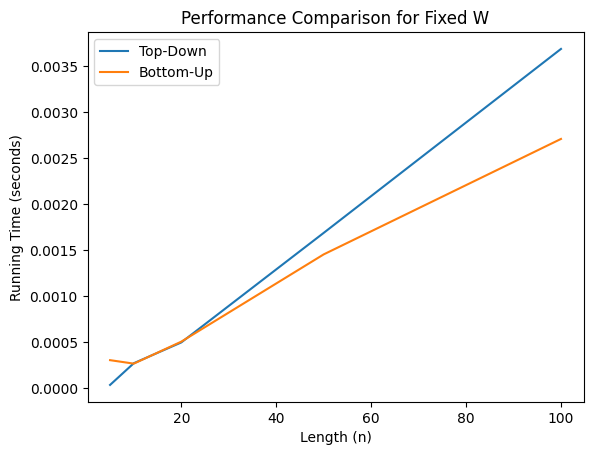

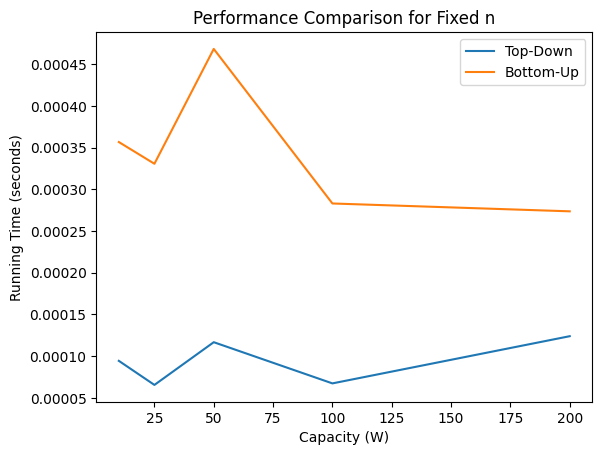

In [28]:
from numpy.ma.core import true_divide
import random
import timeit
import matplotlib.pyplot as plt

n_values = [5, 10, 20, 50, 100]
W_values = [10, 25, 50, 100, 200]

def bottomUp_time(values, weights, W):
    def wrapper():
      bottomUp(values.copy(), weights.copy(), W)
    return timeit.timeit(wrapper, number=10) / 10  # Average time over 10 runs

def topDown_time(values, weights, W):
    def wrapper():
      top_down(values.copy(), weights.copy(), W)
    return timeit.timeit(wrapper, number=10) / 10  # Average time over 10 runs

def generate_random_inputs(n, W):
    values = [random.randint(1, 100) for x in range(n)]
    weights = [random.randint(1, W) for x in range(n)]
    return values, weights, W

def knapsack_performance_comparison(n_values, W_values, fixed_W=True):
    # Store execution times for both algorithms
    times_top_down = []
    times_bottom_up = []

    if fixed_W:
      for n in n_values:
        values, weights, _ = generate_random_inputs(n, W_values[1])
        # Measure time for the top-down approach
        time_top_down = topDown_time(values, weights, W)
        times_top_down.append(time_top_down)

        # Measure time for the bottom-up approach
        time_bottom_up = bottomUp_time(values, weights, W)
        times_bottom_up.append(time_bottom_up)

      # Create a plot for varying n and fixed W
      plt.plot(n_values, times_top_down, label=f'Top-Down')
      plt.plot(n_values, times_bottom_up, label=f'Bottom-Up')
      plt.xlabel('Length (n)')
      plt.ylabel('Running Time (seconds)')
      plt.title('Performance Comparison for Fixed W')
      plt.legend()
      plt.show()

    else:
      for w in W_values:
        values, weights, _ = generate_random_inputs(n_values[1], W)
        # Measure time for the top-down approach
        time_top_down = topDown_time(values, weights, W)
        times_top_down.append(time_top_down)

        # Measure time for the bottom-up approach
        time_bottom_up = bottomUp_time(values, weights, W)
        times_bottom_up.append(time_bottom_up)

      # Create a plot for varying W and fixed n
      plt.plot(W_values, times_top_down, label=f'Top-Down')
      plt.plot(W_values, times_bottom_up, label=f'Bottom-Up')
      plt.xlabel('Capacity (W)')
      plt.ylabel('Running Time (seconds)')
      plt.title('Performance Comparison for Fixed n')
      plt.legend()
      plt.show()




knapsack_performance_comparison(n_values, W_values, fixed_W=True)
knapsack_performance_comparison(n_values, W_values, fixed_W=False)


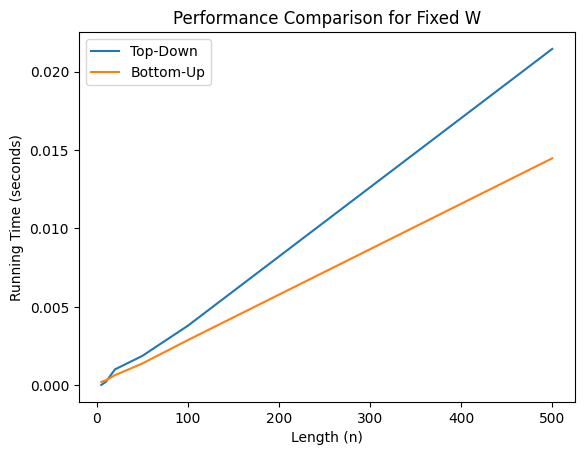

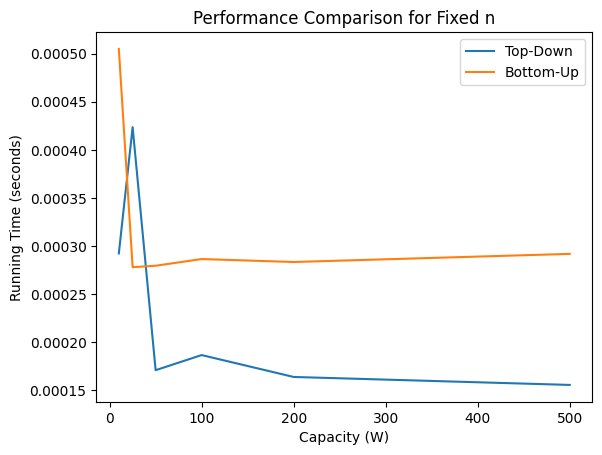

In [30]:
from numpy.ma.core import true_divide
import random
import timeit
import matplotlib.pyplot as plt

n_values = [5, 10, 20, 50, 100, 500]
W_values = [10, 25, 50, 100, 200, 500]

def bottomUp_time(values, weights, W):
    def wrapper():
      bottomUp(values.copy(), weights.copy(), W)
    return timeit.timeit(wrapper, number=10) / 10  # Average time over 10 runs

def topDown_time(values, weights, W):
    def wrapper():
      top_down(values.copy(), weights.copy(), W)
    return timeit.timeit(wrapper, number=10) / 10  # Average time over 10 runs

def generate_random_inputs(n, W):
    values = [random.randint(1, 100) for x in range(n)]
    weights = [random.randint(1, 10) for x in range(n)]
    return values, weights, W

def knapsack_performance_comparison(n_values, W_values, fixed_W=True):
    # Store execution times for both algorithms
    times_top_down = []
    times_bottom_up = []

    if fixed_W:
      for n in n_values:
        values, weights, _ = generate_random_inputs(n, W_values[1])
        # Measure time for the top-down approach
        time_top_down = topDown_time(values, weights, W)
        times_top_down.append(time_top_down)

        # Measure time for the bottom-up approach
        time_bottom_up = bottomUp_time(values, weights, W)
        times_bottom_up.append(time_bottom_up)

      # Create a plot for varying n and fixed W
      plt.plot(n_values, times_top_down, label=f'Top-Down')
      plt.plot(n_values, times_bottom_up, label=f'Bottom-Up')
      plt.xlabel('Length (n)')
      plt.ylabel('Running Time (seconds)')
      plt.title('Performance Comparison for Fixed W')
      plt.legend()
      plt.show()

    else:
      for w in W_values:
        values, weights, _ = generate_random_inputs(n_values[1], W)
        # Measure time for the top-down approach
        time_top_down = topDown_time(values, weights, W)
        times_top_down.append(time_top_down)

        # Measure time for the bottom-up approach
        time_bottom_up = bottomUp_time(values, weights, W)
        times_bottom_up.append(time_bottom_up)

      # Create a plot for varying W and fixed n
      plt.plot(W_values, times_top_down, label=f'Top-Down')
      plt.plot(W_values, times_bottom_up, label=f'Bottom-Up')
      plt.xlabel('Capacity (W)')
      plt.ylabel('Running Time (seconds)')
      plt.title('Performance Comparison for Fixed n')
      plt.legend()
      plt.show()




knapsack_performance_comparison(n_values, W_values, fixed_W=True)
knapsack_performance_comparison(n_values, W_values, fixed_W=False)


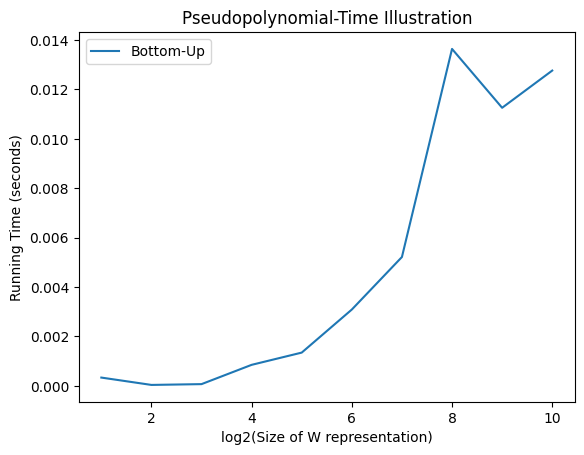

In [31]:
import numpy as np

# ... (previous code)

def knapsack_performance_comparison_pseudopolynomial(n_values, W_values):
    # Store execution times for both algorithms
    times_bottom_up = []

    for W in W_values:
        values, weights, _ = generate_random_inputs(n_values[1], W)

        # Measure time for the bottom-up approach
        time_bottom_up = bottomUp_time(values, weights, W)
        times_bottom_up.append(time_bottom_up)

    # Create a plot for varying W and fixed n
    plt.plot(np.log2(W_values), times_bottom_up, label=f'Bottom-Up')
    plt.xlabel('log2(Size of W representation)')
    plt.ylabel('Running Time (seconds)')
    plt.title('Pseudopolynomial-Time Illustration')
    plt.legend()
    plt.show()

# Set the range of W values to be powers of 2 for illustration
W_values_exponential = [2**i for i in range(1, 11)]

# Call the modified function
knapsack_performance_comparison_pseudopolynomial(n_values, W_values_exponential)


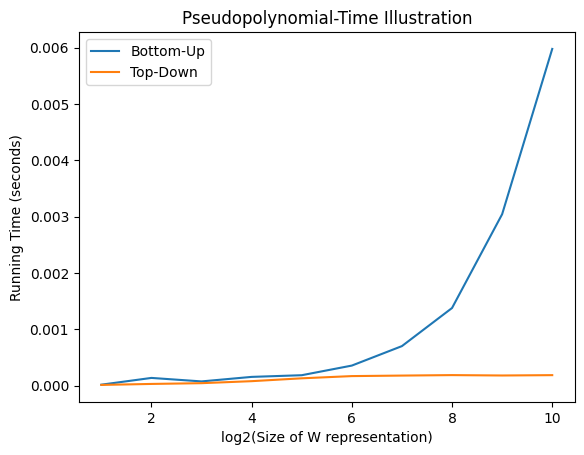

In [32]:
import numpy as np

# ... (previous code)

def knapsack_performance_comparison_pseudopolynomial(n_values, W_values):
    # Store execution times for both algorithms
    times_bottom_up = []
    times_top_down = []

    for W in W_values:
        values, weights, _ = generate_random_inputs(n_values[1], W)

        # Measure time for the bottom-up approach
        time_bottom_up = bottomUp_time(values, weights, W)
        times_bottom_up.append(time_bottom_up)

        # Measure time for the top-down approach
        time_top_down = topDown_time(values, weights, W)
        times_top_down.append(time_top_down)

    # Create a plot for varying W and fixed n
    plt.plot(np.log2(W_values), times_bottom_up, label=f'Bottom-Up')
    plt.plot(np.log2(W_values), times_top_down, label=f'Top-Down')
    plt.xlabel('log2(Size of W representation)')
    plt.ylabel('Running Time (seconds)')
    plt.title('Pseudopolynomial-Time Illustration')
    plt.legend()
    plt.show()

# Set the range of W values to be powers of 2 for illustration
W_values_exponential = [2**i for i in range(1, 11)]

# Call the modified function
knapsack_performance_comparison_pseudopolynomial(n_values, W_values_exponential)
